Polynomial regression with l2 reg. 

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#import seaborn as sns
from scipy.special import softmax

In [183]:
df = pd.read_csv("Student_Performance.csv")
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [184]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Добавляем новые колонки - произведения существующих, проверяем, что столбцы линейно независимы

In [185]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].apply(lambda x: 1 if x == "Yes" else 0)

new_df = df.drop(columns=["Performance Index"])

x: np.ndarray = df.drop(columns=["Performance Index"]).to_numpy()
y: np.ndarray = df["Performance Index"].to_numpy()

test_size = 0.5

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, shuffle=True)

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

columns = x_train.shape[1]
polynomial_degree = 10
for col1 in range(columns):
    if col1 != 2:
        # Добавляем новые параметры - все некатегориальные параметры в i-ой степени
        for i in range(2, polynomial_degree+1):
            x_train = np.column_stack((x_train, x_train[:, col1] ** i))
            x_test = np.column_stack((x_test, x_test[:, col1] ** i))
#  добавляем столбец 1 (y = wx + b => y = WX, где X = x + 1, W = w + b)
x_train = np.column_stack((np.ones(x_train.shape[0]), x_train))
x_test = np.column_stack((np.ones(x_test.shape[0]), x_test))
print(x_train.shape[1])

42


### Число обусловленности полученной матрицы

In [186]:
singular_values = np.linalg.svd(x_train).S
print(np.max(singular_values)/np.min(singular_values))

1.7963094451966352e+16


621563.834 - MSE
612852.351 - MSE on train dataset


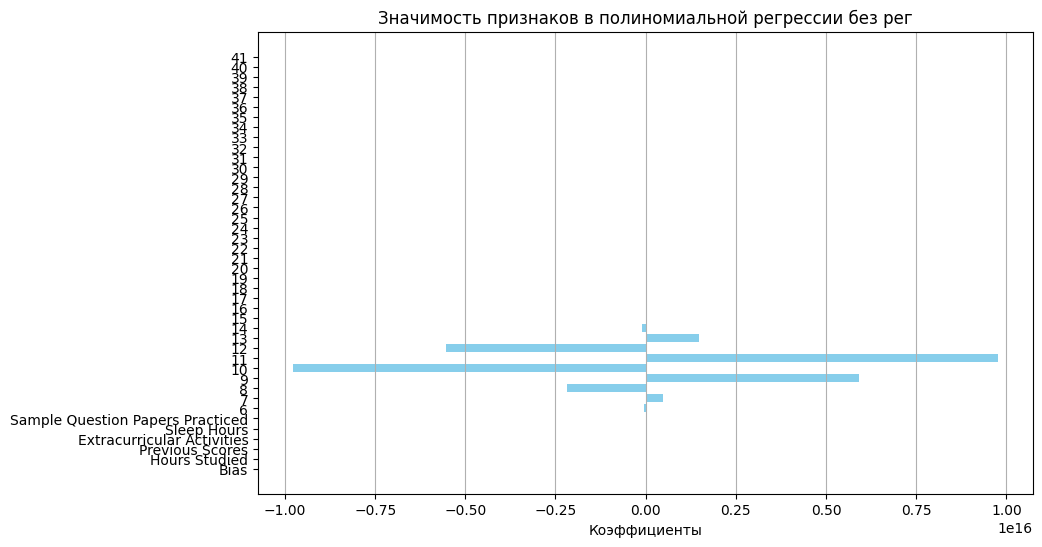

In [187]:
w = np.linalg.inv(x_train.T @ x_train) @ (x_train.T @ y_train)
y_fit = x_test@w

MSE = np.mean((y_fit-y_test)**2)
print(f"{MSE:.3f} - MSE")
MSE_on_train = np.mean((x_train@w-y_train)**2)
print(f"{MSE_on_train:.3f} - MSE on train dataset")

feature_importance = pd.DataFrame({'Feature': np.hstack((["Bias"], new_df.columns.values, [str(i) for i in range(len(new_df.columns)+1, x_train.shape[1])])), 'Coefficient': w})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Коэффициенты')
plt.title('Значимость признаков в полиномиальной регрессии без рег')
plt.grid(axis='x')
plt.show()

In [188]:
print(w, len(w), np.linalg.norm(w))

[-2.47075663e+02  2.50520646e+12  8.55388424e+04 -1.08657366e+01
 -9.70619578e+08  2.18994141e+01 -5.47060727e+13  4.74847599e+14
 -2.18464669e+15  5.91461130e+15 -9.77277453e+15  9.76212998e+15
 -5.52768840e+15  1.48380768e+15 -9.80860749e+13 -2.11382126e+06
  2.21724034e+07 -1.24739327e+08  4.15475312e+08 -8.56216143e+08
  1.10137390e+09 -8.59819762e+08  3.72364386e+08 -6.85817173e+07
 -2.17200663e+10  2.37117264e+11 -4.84095347e+11 -5.78753673e+11
  2.11706507e+12 -4.83075256e+11 -1.39432056e+12 -1.45253871e+11
  7.54007057e+11  6.40488281e+01 -2.32234375e+02  8.82125000e+02
 -2.86675000e+03  5.59050000e+03 -5.80700000e+03  2.71550000e+03
 -1.33750000e+02 -2.02625000e+02] 42 1.6234430819266632e+16


### With gradient descent 

i=100, 16.157 - MSE on train dataset
i=200, 9.170 - MSE on train dataset
i=300, 7.642 - MSE on train dataset
i=400, 7.030 - MSE on train dataset
i=500, 6.627 - MSE on train dataset
i=600, 6.303 - MSE on train dataset
i=700, 6.027 - MSE on train dataset
i=800, 5.789 - MSE on train dataset
i=900, 5.583 - MSE on train dataset
i=1000, 5.404 - MSE on train dataset
i=1100, 5.249 - MSE on train dataset
i=1200, 5.114 - MSE on train dataset
i=1300, 4.997 - MSE on train dataset
i=1400, 4.895 - MSE on train dataset
i=1500, 4.807 - MSE on train dataset
i=1600, 4.730 - MSE on train dataset
i=1700, 4.663 - MSE on train dataset
i=1800, 4.605 - MSE on train dataset
i=1900, 4.554 - MSE on train dataset
i=2000, 4.510 - MSE on train dataset
i=2100, 4.471 - MSE on train dataset
i=2200, 4.438 - MSE on train dataset
i=2300, 4.409 - MSE on train dataset
i=2400, 4.383 - MSE on train dataset
i=2500, 4.361 - MSE on train dataset
i=2600, 4.341 - MSE on train dataset
i=2700, 4.324 - MSE on train dataset
i=2800, 4

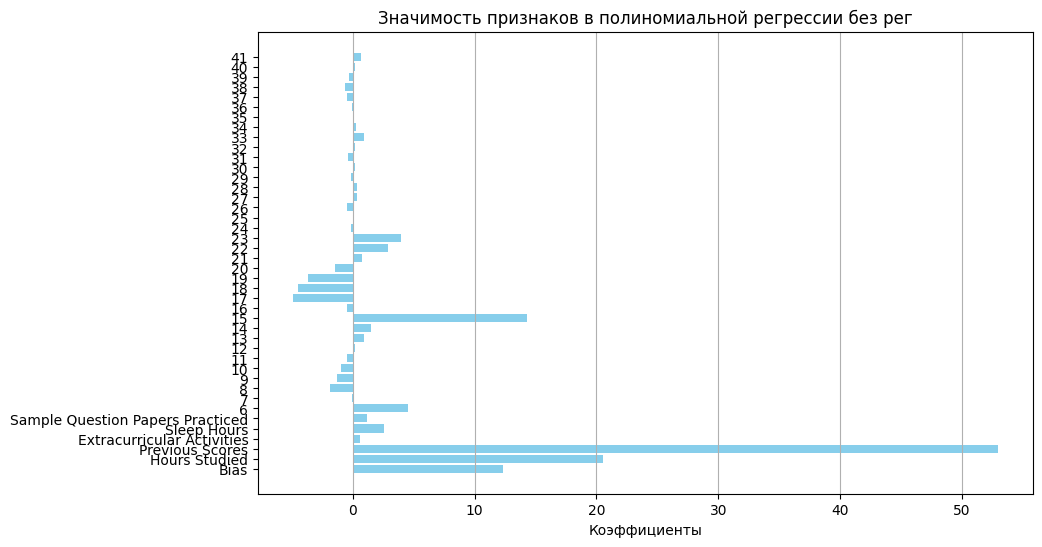

In [189]:
w = np.random.rand(w.shape[0])
diff = 100
max_num = 5000
i = 0
lr = 0.1
while diff >= 0.001 and i < max_num:
    i+=1
    w_old = w
    grad = 2 * (x_train.T @ x_train @ w - (x_train.T @ y_train)) / x_train.shape[0] 
    w -= lr * grad
    diff = abs(np.linalg.norm(w) + np.linalg.norm(w_old))
    if i % 100 == 0:
        MSE_on_train = np.mean((x_train@w-y_train)**2)
        print(f"i={i}, {MSE_on_train:.3f} - MSE on train dataset")

MSE = np.mean((y_fit-y_test)**2)
print(f"{MSE:.3f} - MSE")
MSE_on_train = np.mean((x_train@w-y_train)**2)
print(f"{MSE_on_train:.3f} - MSE on train dataset")

feature_importance = pd.DataFrame({'Feature': np.hstack((["Bias"], new_df.columns.values, [str(i) for i in range(len(new_df.columns)+1, x_train.shape[1])])), 'Coefficient': w})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Коэффициенты')
plt.title('Значимость признаков в полиномиальной регрессии без рег')
plt.grid(axis='x')
plt.show()

### Аналитическое решение с L2 регуляризацией

4.171 - MSE
4.129 - MSE on train dataset


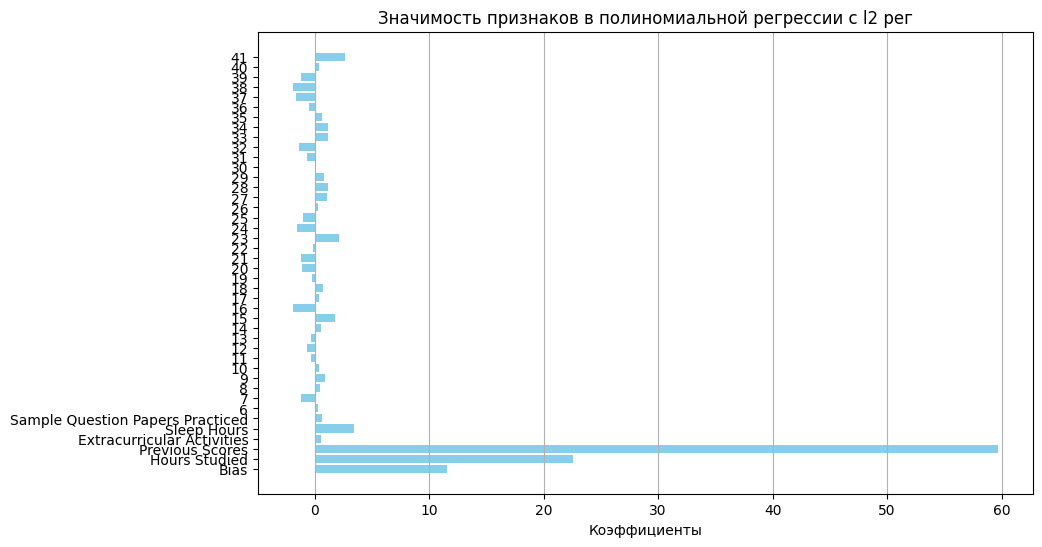

In [190]:
alpha = 0.1

#print(x[0])
w = np.linalg.inv(x_train.T @ x_train + alpha * np.eye(x_train.shape[1])) @ x_train.T @ y_train
y_fit = x_test@w
MSE = np.mean((y_fit-y_test)**2)
print(f"{MSE:.3f} - MSE")
MSE_on_train = np.mean((x_train@w - y_train)**2)
print(f"{MSE_on_train:.3f} - MSE on train dataset")

feature_importance = pd.DataFrame({'Feature': np.hstack((["Bias"], new_df.columns.values, [str(i) for i in range(len(new_df.columns)+1, x_train.shape[1])])), 'Coefficient': w})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Коэффициенты')
plt.title('Значимость признаков в полиномиальной регрессии с l2 рег')
plt.grid(axis='x')
plt.show()

In [191]:
print(w, len(w), np.linalg.norm(w))

[11.55271737 22.59318032 59.6616653   0.5670909   3.42182013  0.68980633
  0.27823792 -1.17801744  0.50006774  0.91471449  0.35098726 -0.3347269
 -0.61592352 -0.30190037  0.59757993  1.82851005 -1.84503935  0.38174479
  0.74246489 -0.20619234 -1.13639786 -1.22399594 -0.14875056  2.09557941
 -1.52228218 -0.98784801  0.34435669  1.11692564  1.20060415  0.79872425
  0.13568546 -0.62395552 -1.37894837  1.1404824   1.21759507  0.69409307
 -0.52260713 -1.5753345  -1.86255205 -1.19136986  0.3716303   2.6455497 ] 42 65.27890863899636


### Как мы видим, многие веса модели крайне малы, гораздо эффективнее с их минимизацией справится L1 регуляризация.


In [192]:
def MSE(y, y_pred):
    return ((y - y_pred)**2).mean()

alpha = 0.1
beta = 0.01

# l1_array = np.zeros(shape=(x_train.shape[1]))
# for coordinate in range(x_train.shape[1]):
#     if abs(w[coordinate]) < 10 ** -7:
#         l1_array[coordinate] = 0
#     elif w[coordinate] > 0:
#         l1_array[coordinate] = -1/2
#     else:
#         l1_array[coordinate] = 1/2

w_elastic = w
l1_array = np.zeros(shape=(x_train.shape[1]))
for i in range(100):
    for coordinate in range(x_train.shape[1]):
        if abs(w_elastic[coordinate]) < 10 ** -7:
            l1_array[coordinate] = 0
        elif w_elastic[coordinate] > 0:
            l1_array[coordinate] += -(1/2 ** i)
        else:
            l1_array[coordinate] += (1/2 ** i)
    w_elastic = np.linalg.pinv(x_train.T @ x_train + alpha * np.eye(x_train.shape[1])) @ (x_train.T @ y_train + beta * l1_array)
#y_fit = x_test@w_elastic
print(f"{MSE(y_test, x_test@w_elastic)} - MSE")

print(f"{MSE(y_train, x_train@w_elastic)} - MSE on train dataset")
print(w_elastic, len(w_elastic), np.linalg.norm(w_elastic))

4.171407513305157 - MSE
4.12889222770301 - MSE on train dataset
[ 1.15537922e+01  2.26020367e+01  5.96656892e+01  5.67093155e-01
  3.42151177e+00  6.72660020e-01  1.73453763e-01 -8.95752407e-01
  3.72068582e-01  7.63784523e-01  1.71478556e-01 -1.41137664e-01
 -4.43732594e-01 -1.44501216e-01  3.46403355e-01  1.75044628e+00
 -1.57097036e+00  1.93883154e-01  4.96521152e-01 -9.10043645e-02
 -1.03602669e+00 -1.11592173e+00 -1.45671252e-02  1.86966192e+00
 -1.57771408e+00 -8.35035626e-01  2.77857995e-01  1.11384087e+00
  1.17215720e+00  6.95052434e-01  1.35497692e-01 -5.24439185e-01
 -1.37401885e+00  1.22166643e+00  1.19090674e+00  4.99587273e-01
 -4.35370799e-01 -1.53096712e+00 -1.79440227e+00 -1.05037453e+00
  2.17664388e-01  2.61535213e+00] 42 65.23683575009765


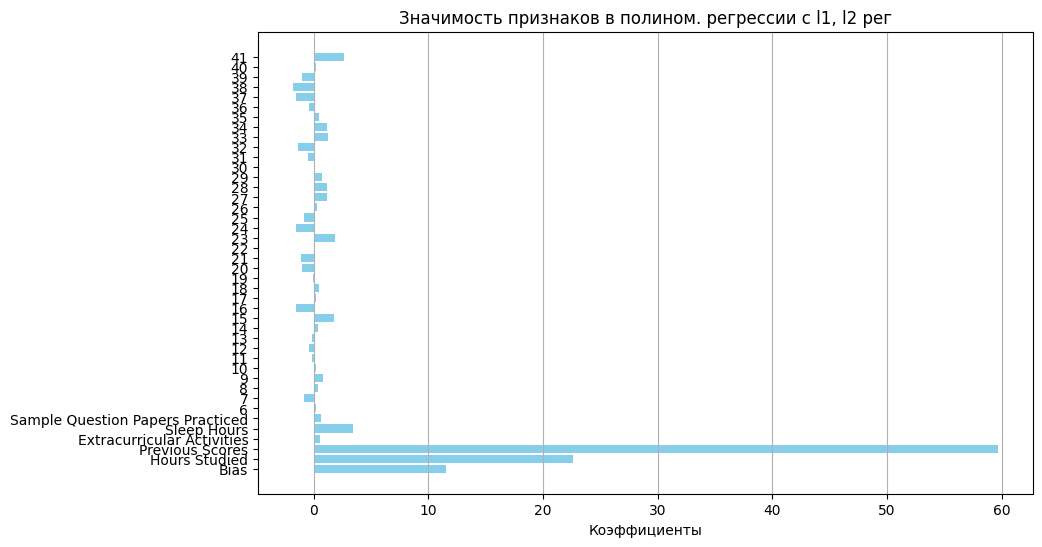

In [193]:
feature_importance = pd.DataFrame({'Feature': np.hstack((["Bias"], new_df.columns.values, [str(i) for i in range(len(new_df.columns)+1, x_train.shape[1])])), 'Coefficient': w_elastic})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Коэффициенты')
plt.title('Значимость признаков в полином. регрессии c l1, l2 рег')
plt.grid(axis='x')
plt.show()

In [194]:
def convert_100_5(x):
    conversion = {20: 0,
                  40: 1,
                  60: 2,
                  80: 3,
                  100: 4,}
    for key, el in conversion.items():
        if x <= key:
            return el

y_converted = np.array([convert_100_5(x) for x in y_train])
y_test_converted = np.array([convert_100_5(int(x)) for x in y_test], dtype=int)
y_fit_converted = np.array([convert_100_5(x) for x in x_test@w])
print(np.unique(y_converted))
#понадобится потом

[0 1 2 3 4]


In [195]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [196]:
model = LogisticRegression(penalty="l2", solver="saga", max_iter=5000)
model.fit(x_train, y_converted)
y_classification = model.predict(x_test)
print(np.unique(y_classification))
print(f'{accuracy_score(y_classification, y_test_converted)} - acc of classification task')
print(f'{accuracy_score(y_test_converted, y_fit_converted)} - acc of regression task')

[0 1 2 3 4]
0.8896 - acc of classification task
0.915 - acc of regression task


In [197]:
print(["Bias"], new_df.columns.values )
print([i for i in range(len(new_df.columns) + 1, x_train.shape[1])])

['Bias'] ['Hours Studied' 'Previous Scores' 'Extracurricular Activities'
 'Sleep Hours' 'Sample Question Papers Practiced']
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


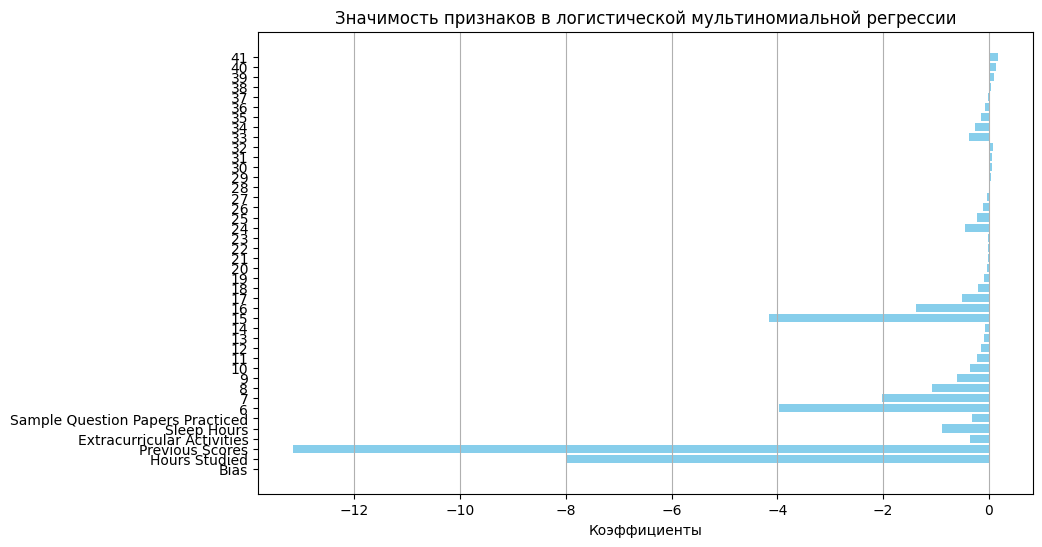

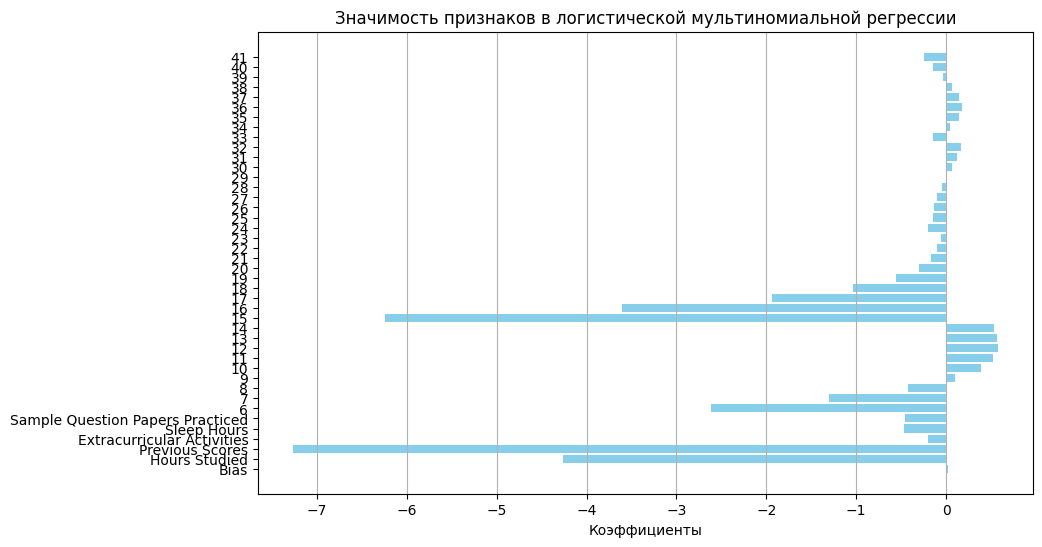

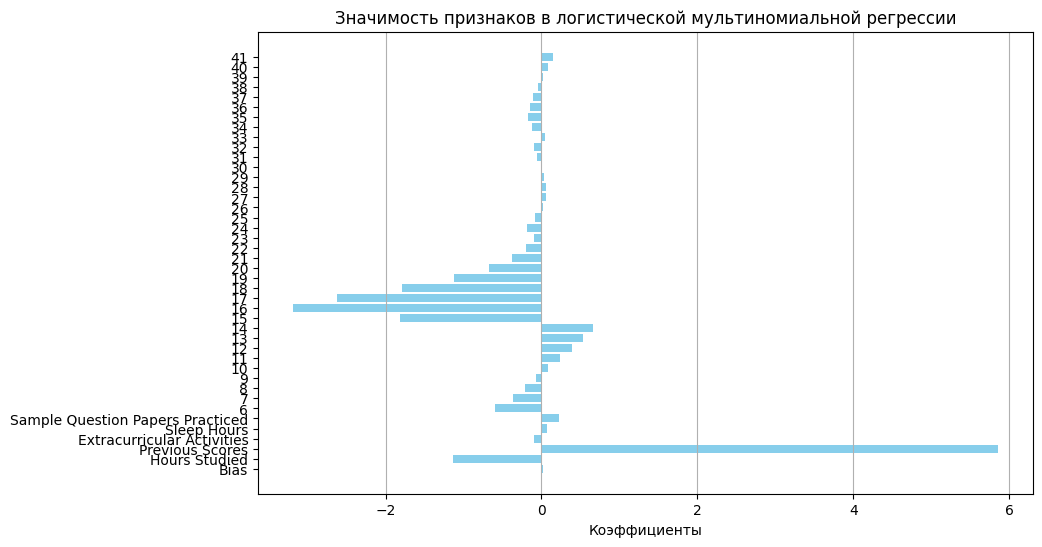

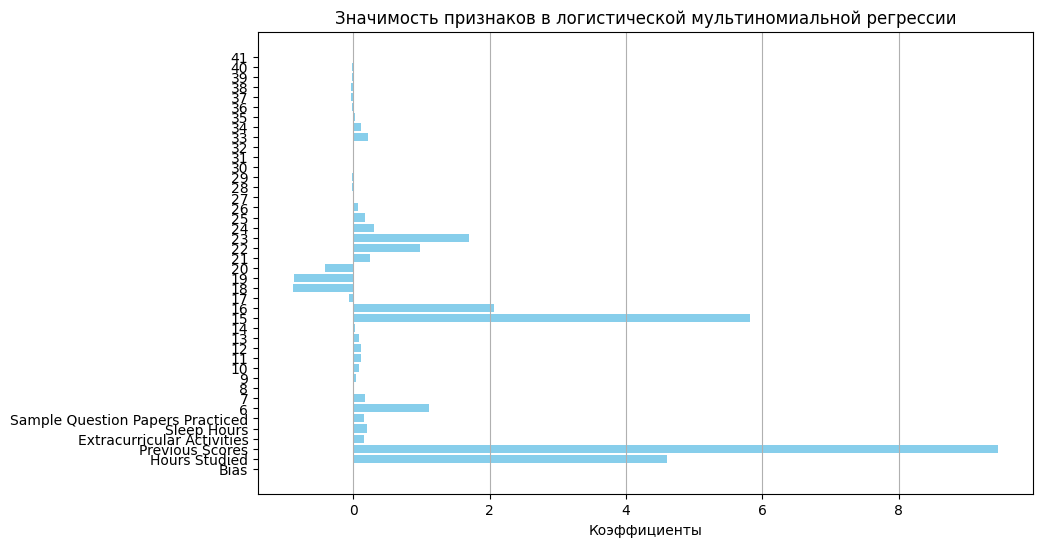

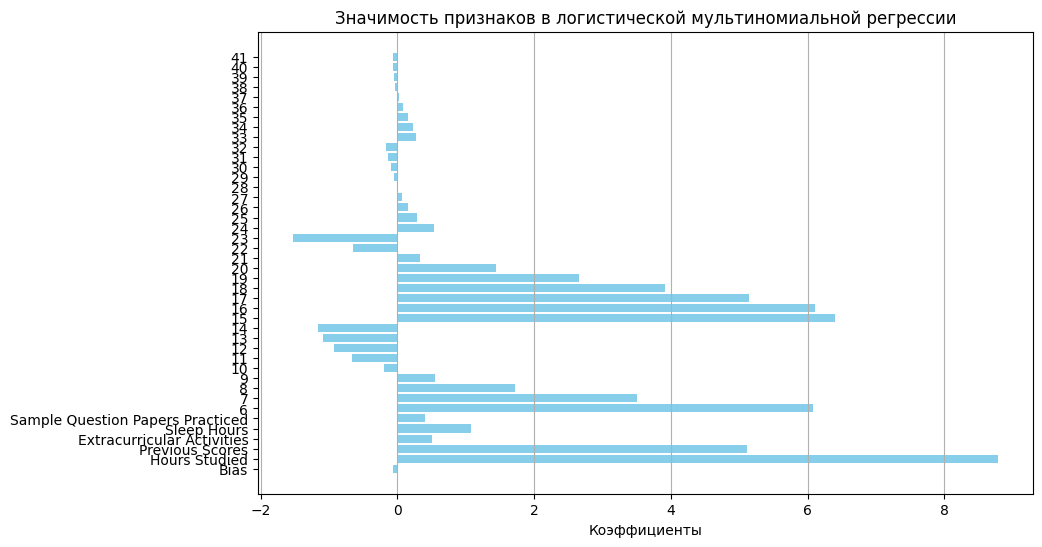

In [198]:
model_coefficients = model.coef_
for coefficients in model_coefficients:
    feature_importance = pd.DataFrame({'Feature': np.hstack((["Bias"], new_df.columns.values, [str(i) for i in range(len(new_df.columns)+1, x_train.shape[1])])), 'Coefficient': coefficients})

    #feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
    plt.xlabel('Коэффициенты')
    plt.title('Значимость признаков в логистической мультиномиальной регрессии')
    plt.grid(axis='x')
    plt.show()